# Week 6 lecture: Numerical integration

Charlotte Desvages

## Interpolatory quadrature: general principle

1. Split interval into smaller sub-intervals.

2. Approximate the function with a **polynomial**, over each separate sub-interval.

3. Calculate the integral of the polynomial, over each separate sub-interval.

4. Sum the computed polynomial integrals for each sub-interval.

## How accurate will it be?

For an arbitrary function, accuracy will depend on 2 things:

1. Inside each sub-interval, how well the polynomial approximates the function: **degree of precision**

2. How many sub-intervals we choose to compute the approximation: **rate of convergence**

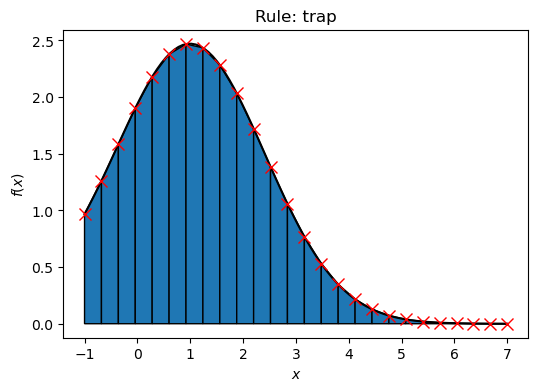

In [5]:
# Import our custom 'integration.py' module
import integration as intg
import numpy as np

# Create some test function
def f(x):
    return np.sqrt(np.cosh(x + 2) * np.exp(-0.5*x**2))

# We want to integrate f over an interval [a, b], sub-divided into N segments
a, b = -1, 7
N = 25

# Illustrate the method
intg.display_diagram('trap', f, a, b, N)

## Quadrature rules

A **quadrature rule** is the method we choose to approximate the function **inside each sub-interval**.

We choose the reference interval $[-1, 1]$ -- easy to adapt the rule to other intervals as it's linear.

$$
\int_{-1}^1 f(x) dx \approx \sum_{k=0}^{N-1} w_k f(x_k).
$$

A quadrature rule is defined by its $N$ **nodes** $x_k$ and **weights** $w_k$.

- The **nodes** are the points in $[-1, 1]$ we choose, where we want our approximating polynomial to coincide with the function. They are *interpolation points*.
- The **weights** are determined by aiming for a particular **degree of precision**.

This gives us a workaround to having to compute polynomial integrals every time!

## Degree of precision

A quadrature rule has degree of precision $m$ if it integrates polynomials of **degree up to $m$ exactly**, but **not** polynomials of degree $m+1$.

---

Given $N$ nodes $x_k$, there exists an interpolating polynomial $p(x)$ of degree $N-1$ which passes through all points $(x_k, f(x_k))$.

This is to say that $f(x_k) = p(x_k)$ for all $k = 0, 1, \dots, N-1$.

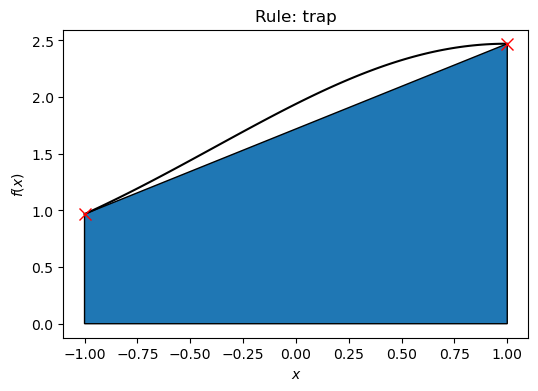

In [6]:
a, b = -1, 1
N = 1
intg.display_diagram('trap', f, a, b, N)

## Example: trapezoid rule

1. Choose nodes: $x_0 = -1$, $x_1 = 1$

2. With 2 nodes, the **interpolating polynomial** has degree 1. (It is the line that passes through $(-1, f(-1))$ and $(1, f(1))$.)

3. We therefore need the quadrature rule to integrate degree-1 polynomials exactly, i.e. to have degree of precision (DOP) of **at least** 1.

4. Use elementary polynomials of degree 0 and 1 to find the weights.